# Task 1

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as sts 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

# pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
train = pd.read_csv("D:\Data Science\Course 11\DS3_C1_S3_DailyDelhiClimateTrain_Data_Practice.csv", index_col = "date", parse_dates = True)
train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
train = train[["meantemp"]]
train.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


In [4]:
test = pd.read_csv("D:\Data Science\Course 11\DS3_C1_S3_DailyDelhiClimateTest_Data_Practice.csv", index_col = "date", parse_dates = True)
test.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [5]:
test = train[["meantemp"]]
test.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


In [6]:
print(train.isnull().sum())
print(test.isnull().sum())

meantemp    0
dtype: int64
meantemp    0
dtype: int64


In [7]:
Train_data = train["meantemp"]

In [8]:
test_data = test["meantemp"]

<AxesSubplot:xlabel='date'>

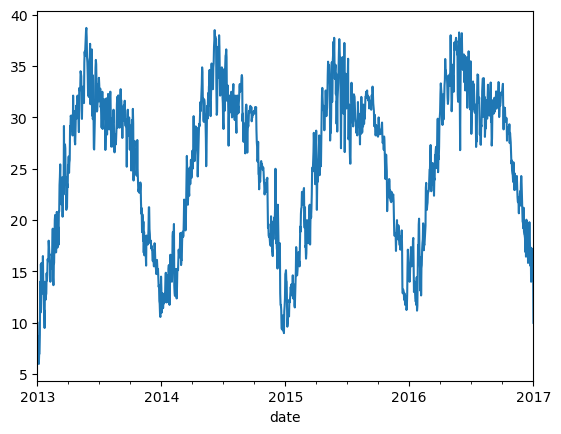

In [9]:
Train_data.plot()

<AxesSubplot:xlabel='date'>

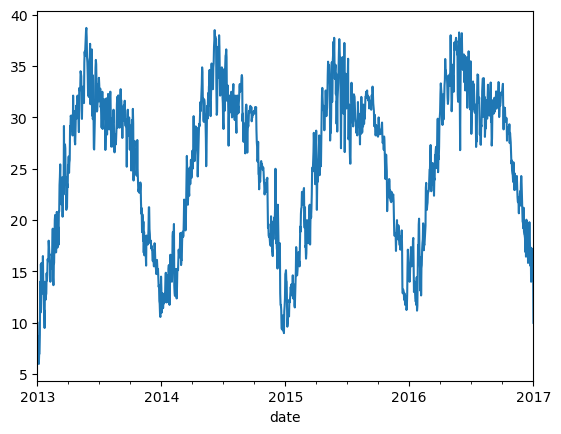

In [10]:
test_data.plot()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
decomposition = seasonal_decompose(Train_data, period = 12)
decomposition

In [13]:
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

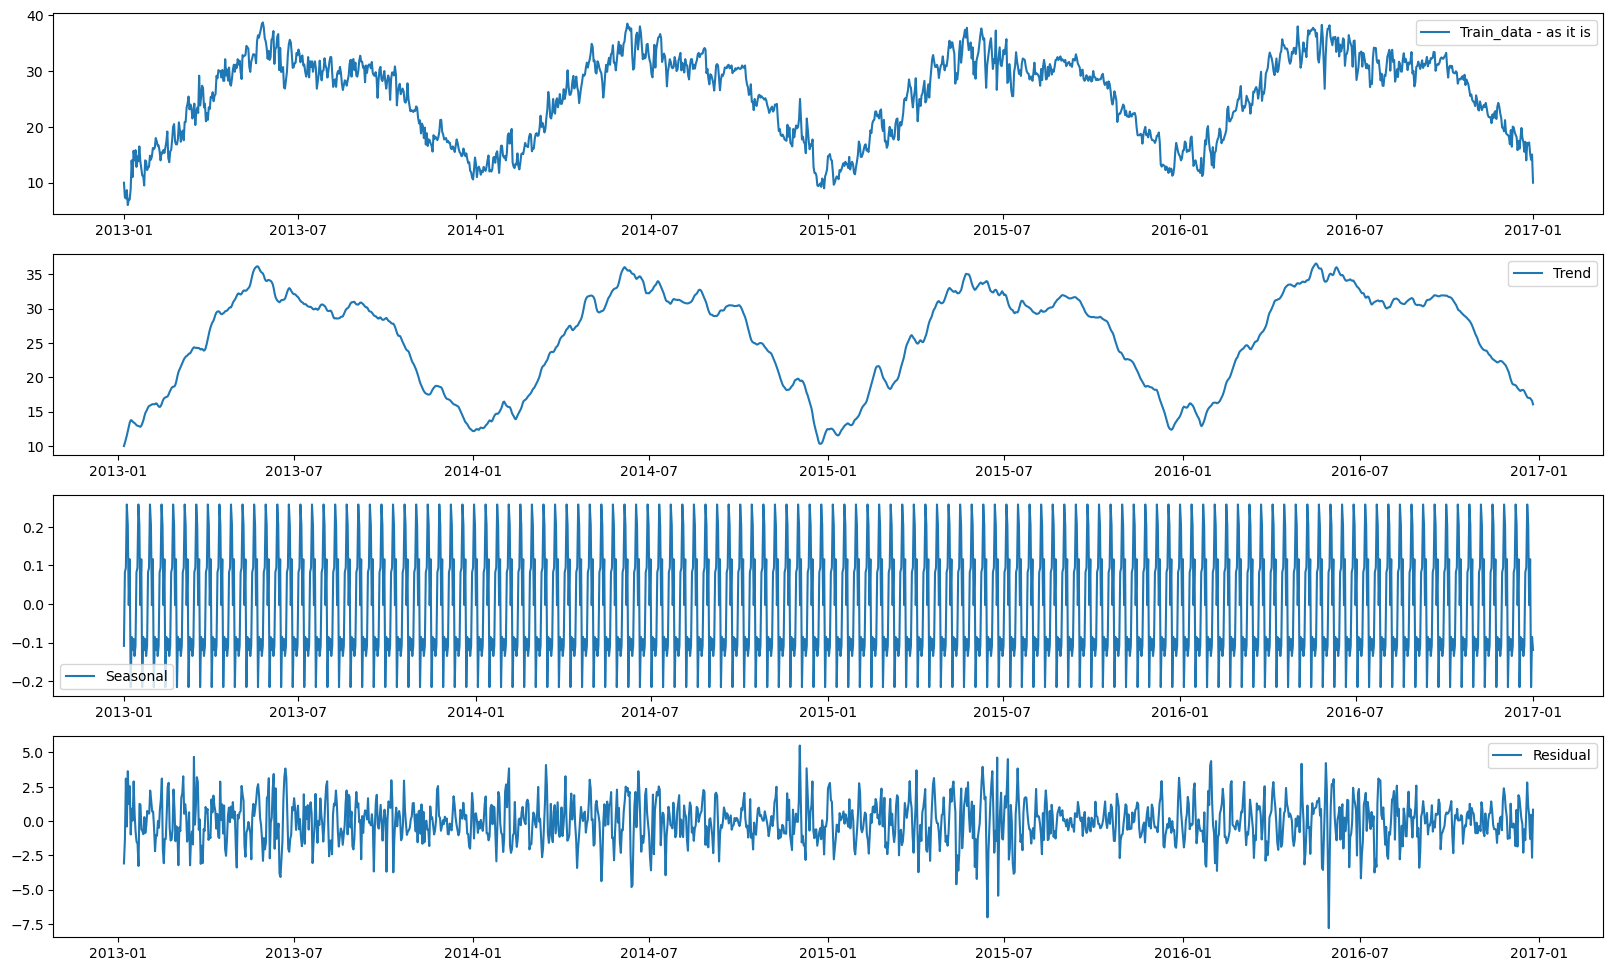

In [14]:
# plotting all the 4 graph
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(Train_data,label='Train_data - as it is')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best') 

In [15]:
from statsmodels.tsa.api import ExponentialSmoothing

alpha = 0.37; beta = 0.5; gamma = 0.15

model3 = ExponentialSmoothing(Train_data, trend= 'add', seasonal='add', seasonal_periods=12).fit(smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal = gamma)

In [16]:
predicted_model3 = model3.fittedvalues

In [25]:
Train_Data = predicted_model3

In [27]:
Train_Data

date
2013-01-01    10.443651
2013-01-02     7.727282
2013-01-03     6.039292
2013-01-04     6.910497
2013-01-05     7.781490
                ...    
2016-12-28    13.317847
2016-12-29    13.382149
2016-12-30    11.980648
2016-12-31    11.984850
2017-01-01    12.585291
Length: 1462, dtype: float64

# Task 2

In [17]:
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

In [28]:
from statsmodels.tsa.stattools import adfuller

def checkStationarity(data):
    pvalue = adfuller(data)[1]
    print(pvalue)
    if pvalue < 0.05 :
        msg = "pvalue = {}. Data is stationary. Proceed to model building".format(pvalue)
    else :
        msg = "pvalue = {}. Data is not stationary. Make the data stationary before model building"
    return msg

In [29]:
print(checkStationarity(Train_Data))

0.10189713650324167
pvalue = {}. Data is not stationary. Make the data stationary before model building


In [30]:
diff_train = Train_Data - Train_Data.shift()
diff_train

date
2013-01-01         NaN
2013-01-02   -2.716369
2013-01-03   -1.687991
2013-01-04    0.871206
2013-01-05    0.870993
                ...   
2016-12-28   -2.053433
2016-12-29    0.064302
2016-12-30   -1.401501
2016-12-31    0.004201
2017-01-01    0.600441
Length: 1462, dtype: float64

In [31]:
diff_train.dropna(inplace = True)

In [32]:
print(checkStationarity(diff_train))

2.0644977294263932e-11
pvalue = 2.0644977294263932e-11. Data is stationary. Proceed to model building


# Task 3 :- Time series Models

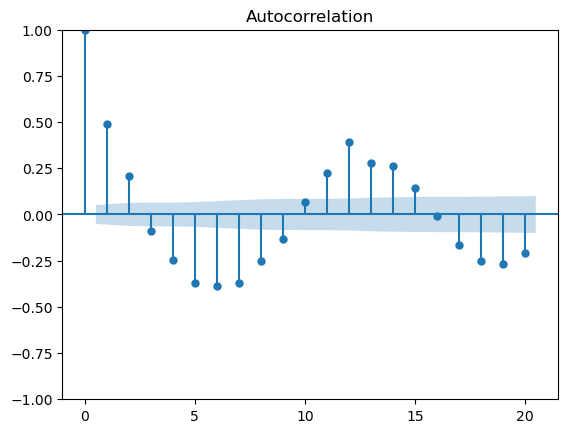

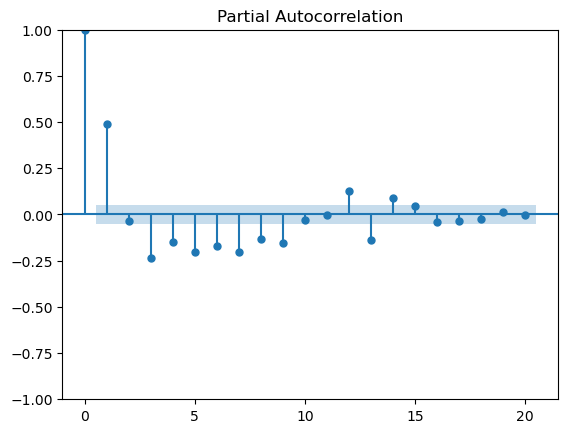

In [33]:
plot_acf(diff_train, lags = 20);
plot_pacf(diff_train, lags= 20);

# AR Model

In [35]:
from statsmodels.tsa.arima.model import ARIMA

ar_m1 = ARIMA (diff_train, order = (1,0,0))
r1 = ar_m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1461
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2597.677
Date:                Mon, 27 Feb 2023   AIC                           5201.354
Time:                        15:15:50   BIC                           5217.215
Sample:                    01-02-2013   HQIC                          5207.270
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.036e-05      0.074      0.001      0.999      -0.145       0.145
ar.L1          0.4894      0.021     23.189      0.000       0.448       0.531
sigma2         2.0503      0.064     32.204      0.0

In [36]:
d = 0
q = 0
min_aic = np.inf
min_p = -1

for p in range(1, 14):
    arima_model = sm.tsa.ARIMA(diff_train, order=(p, d, q))
    result = arima_model.fit()

    print(f"ARIMA({p}, {d}, {q}) Results:")
    print(result.summary())
    
    if result.aic < min_aic:
        min_aic = result.aic
        min_p = p

print(f"The value of p with the minimum AIC is {min_p} (AIC={min_aic}).")


ARIMA(1, 0, 0) Results:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1461
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2597.677
Date:                Mon, 27 Feb 2023   AIC                           5201.354
Time:                        15:20:44   BIC                           5217.215
Sample:                    01-02-2013   HQIC                          5207.270
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.036e-05      0.074      0.001      0.999      -0.145       0.145
ar.L1          0.4894      0.021     23.189      0.000       0.448       0.531
sigma2         2.0503      0

The value of p with the minimum AIC is 13 (AIC=4827.548155618221).

# MA Model

In [37]:
d = 0
p = 0

min_aic = np.inf
min_q = -1

for q in range(1, 12):
    ma_model = sm.tsa.ARIMA(diff_train, order=(p, d, q))
    result = ma_model.fit()
    
    print(f"ARIMA({p}, {d}, {q}) Results:")
    print(result.summary())
    
    if result.aic < min_aic:
        min_aic = result.aic
        min_q = q

print(f"The value of q with the minimum AIC is {min_q} (AIC={min_aic}).")


ARIMA(0, 0, 1) Results:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1461
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2643.116
Date:                Mon, 27 Feb 2023   AIC                           5292.232
Time:                        15:28:01   BIC                           5308.092
Sample:                    01-02-2013   HQIC                          5298.148
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.054      0.021      0.983      -0.105       0.107
ma.L1          0.3889      0.023     17.160      0.000       0.344       0.433
sigma2         2.1820      0

The value of q with the minimum AIC is 11 (AIC=5004.839060858295).


# MODEL BUILDING - ARMA

In [38]:
ss = int(0.7 * len(diff_train))

train = diff_train.iloc[:ss]
test = diff_train.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 1022, test = 439


In [39]:
p = 13; q =11

m1 = ARIMA(diff_train, order= (p,0,q))
r1 = m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1461
Model:               ARIMA(13, 0, 11)   Log Likelihood               -2358.408
Date:                Mon, 27 Feb 2023   AIC                           4768.816
Time:                        15:31:06   BIC                           4906.274
Sample:                    01-02-2013   HQIC                          4820.092
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.047      0.113      0.910      -0.088       0.098
ar.L1          0.2944      0.105      2.792      0.005       0.088       0.501
ar.L2          0.5411      0.059      9.200      0.0

# LJung Box Test

In [40]:
pvalue = sm.stats.acorr_ljungbox(r1.resid, lags=[1], return_df= True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0 . Bad Model")
else:
    print("Fail-to-Reject H0. Hence the select model is Good Model")

[0.64889224]
Fail-to-Reject H0. Hence the select model is Good Model


In [41]:
# predictions 
predictions = r1.predict(0,len(test)-1)
print(predictions)

2013-01-02    0.005369
2013-01-03   -1.348637
2013-01-04   -0.766761
2013-01-05    0.932879
2013-01-06    1.226307
                ...   
2014-03-12   -0.800241
2014-03-13   -0.128956
2014-03-14    0.300722
2014-03-15   -0.196656
2014-03-16    0.347006
Freq: D, Name: predicted_mean, Length: 439, dtype: float64


In [44]:
actual = []; pred =[]

for i in range(len(predictions)):
    actual.append(test[i])
    pred.append(predictions[i])
    
df_res = pd.DataFrame({'actual': actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

       actual  predicted       err
0   -0.270413   0.005369 -0.275782
1   -1.419870  -1.348637 -0.071233
2   -1.666304  -0.766761 -0.899543
3   -0.455476   0.932879 -1.388354
4    0.160313   1.226307 -1.065994
..        ...        ...       ...
434 -2.053433  -0.800241 -1.253192
435  0.064302  -0.128956  0.193257
436 -1.401501   0.300722 -1.702223
437  0.004201  -0.196656  0.200858
438  0.600441   0.347006  0.253436

[439 rows x 3 columns]


# Calcluate MSE and RMSE of the model from test

In [45]:
msg = 'ARMA Model. Order = (13,11)'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}". format(mse1,np.sqrt(mse1)))

ARMA Model. Order = (13,11)
	MSE = 3.8225592526833276
	RMSE = 1.9551366327403636


Text(0.5, 1.0, 'ARMA Model. Order = (13,11)')

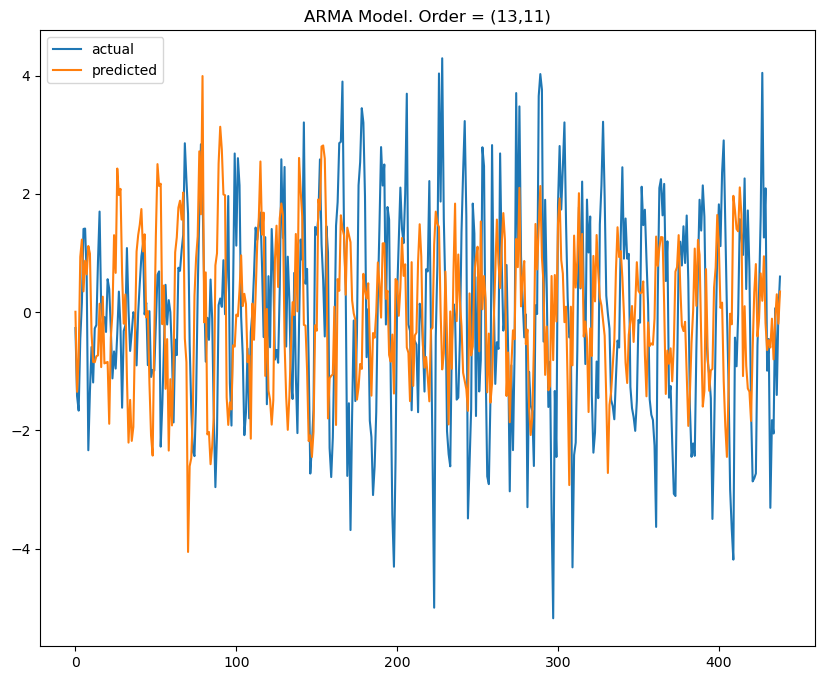

In [46]:
df_res.actual.plot(figsize = (10,8), legend = True)
df_res.predicted.plot(legend = True)
plt.title(msg)

# Test Data

In [47]:
test_data

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

#### Smothing Data

In [48]:
from statsmodels.tsa.api import ExponentialSmoothing

alpha = 0.37; beta = 0.5; gamma = 0.15

model3 = ExponentialSmoothing(test_data, trend= 'add', seasonal='add', seasonal_periods=12).fit(smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal = gamma)

In [49]:
predicted_model3 = model3.fittedvalues

In [51]:
Test_Data = predicted_model3

### Make data Stationarity

In [52]:
from statsmodels.tsa.stattools import adfuller

def checkStationarity(data):
    pvalue = adfuller(data)[1]
    print(pvalue)
    if pvalue < 0.05 :
        msg = "pvalue = {}. Data is stationary. Proceed to model building".format(pvalue)
    else :
        msg = "pvalue = {}. Data is not stationary. Make the data stationary before model building"
    return msg

In [53]:
print(checkStationarity(Test_Data))

0.10189713650324167
pvalue = {}. Data is not stationary. Make the data stationary before model building


In [54]:
diff_test = Test_Data - Test_Data.shift()
diff_test

date
2013-01-01         NaN
2013-01-02   -2.716369
2013-01-03   -1.687991
2013-01-04    0.871206
2013-01-05    0.870993
                ...   
2016-12-28   -2.053433
2016-12-29    0.064302
2016-12-30   -1.401501
2016-12-31    0.004201
2017-01-01    0.600441
Length: 1462, dtype: float64

In [55]:
diff_test.dropna(inplace = True)

In [57]:
print(checkStationarity(diff_test))

2.0644977294263932e-11
pvalue = 2.0644977294263932e-11. Data is stationary. Proceed to model building


## MODEL BUILDING - ARMA

In [58]:
ss = int(0.7 * len(diff_test))

train = diff_train.iloc[:ss]
test = diff_train.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 1022, test = 439


In [59]:
p = 13; q =11

m1 = ARIMA(diff_test, order= (p,0,q))
r1 = m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1461
Model:               ARIMA(13, 0, 11)   Log Likelihood               -2358.408
Date:                Mon, 27 Feb 2023   AIC                           4768.816
Time:                        15:49:28   BIC                           4906.274
Sample:                    01-02-2013   HQIC                          4820.092
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.047      0.113      0.910      -0.088       0.098
ar.L1          0.2944      0.105      2.792      0.005       0.088       0.501
ar.L2          0.5411      0.059      9.200      0.0

### LJung Box Test

In [60]:
pvalue = sm.stats.acorr_ljungbox(r1.resid, lags=[1], return_df= True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0 . Bad Model")
else:
    print("Fail-to-Reject H0. Hence the select model is Good Model")

[0.64889224]
Fail-to-Reject H0. Hence the select model is Good Model


In [61]:
# predictions 
predictions = r1.predict(0,len(test)-1)
print(predictions)

2013-01-02    0.005369
2013-01-03   -1.348637
2013-01-04   -0.766761
2013-01-05    0.932879
2013-01-06    1.226307
                ...   
2014-03-12   -0.800241
2014-03-13   -0.128956
2014-03-14    0.300722
2014-03-15   -0.196656
2014-03-16    0.347006
Freq: D, Name: predicted_mean, Length: 439, dtype: float64


In [62]:
actual = []; pred =[]

for i in range(len(predictions)):
    actual.append(test[i])
    pred.append(predictions[i])
    
df_res = pd.DataFrame({'actual': actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

       actual  predicted       err
0   -0.270413   0.005369 -0.275782
1   -1.419870  -1.348637 -0.071233
2   -1.666304  -0.766761 -0.899543
3   -0.455476   0.932879 -1.388354
4    0.160313   1.226307 -1.065994
..        ...        ...       ...
434 -2.053433  -0.800241 -1.253192
435  0.064302  -0.128956  0.193257
436 -1.401501   0.300722 -1.702223
437  0.004201  -0.196656  0.200858
438  0.600441   0.347006  0.253436

[439 rows x 3 columns]


In [63]:
msg = 'ARMA Model. Order = (13,11)'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}". format(mse1,np.sqrt(mse1)))

ARMA Model. Order = (13,11)
	MSE = 3.8225592526833276
	RMSE = 1.9551366327403636


Text(0.5, 1.0, 'ARMA Model. Order = (13,11)')

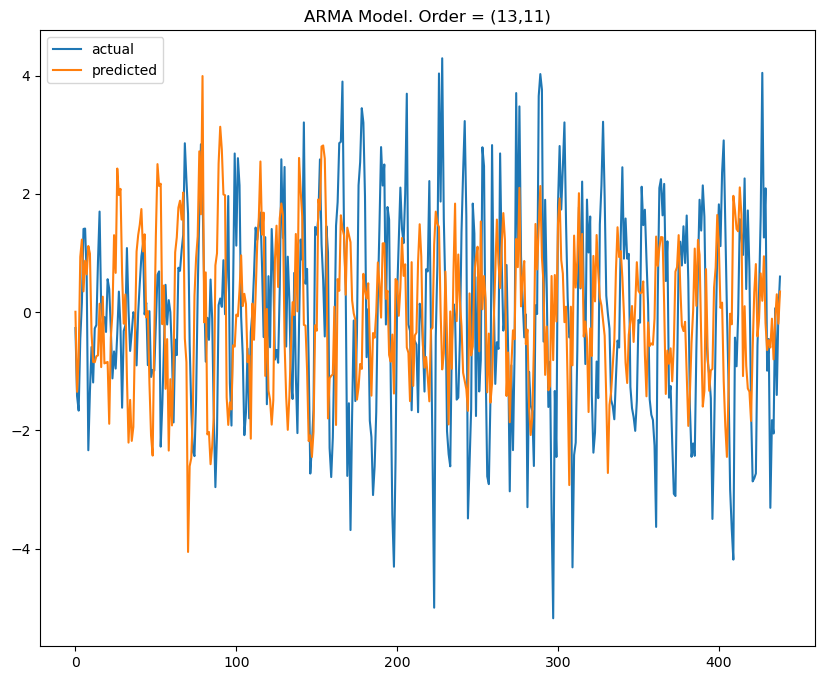

In [64]:
df_res.actual.plot(figsize = (10,8), legend = True)
df_res.predicted.plot(legend = True)
plt.title(msg)